# $-\Delta u = -u'' = f$
I am looking at solving (in 1D for now) the equation $-\Delta u = -u'' = f$ for unknown function $u$ with B.C. u(0) = u(1) = 0

In [1]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax.random as random
from jax.numpy import array as æ

## Iterative solutions

[0.01371644 0.02743299 0.04114977 0.05486685 0.06858426 0.06995635
 0.05898306 0.03566431]


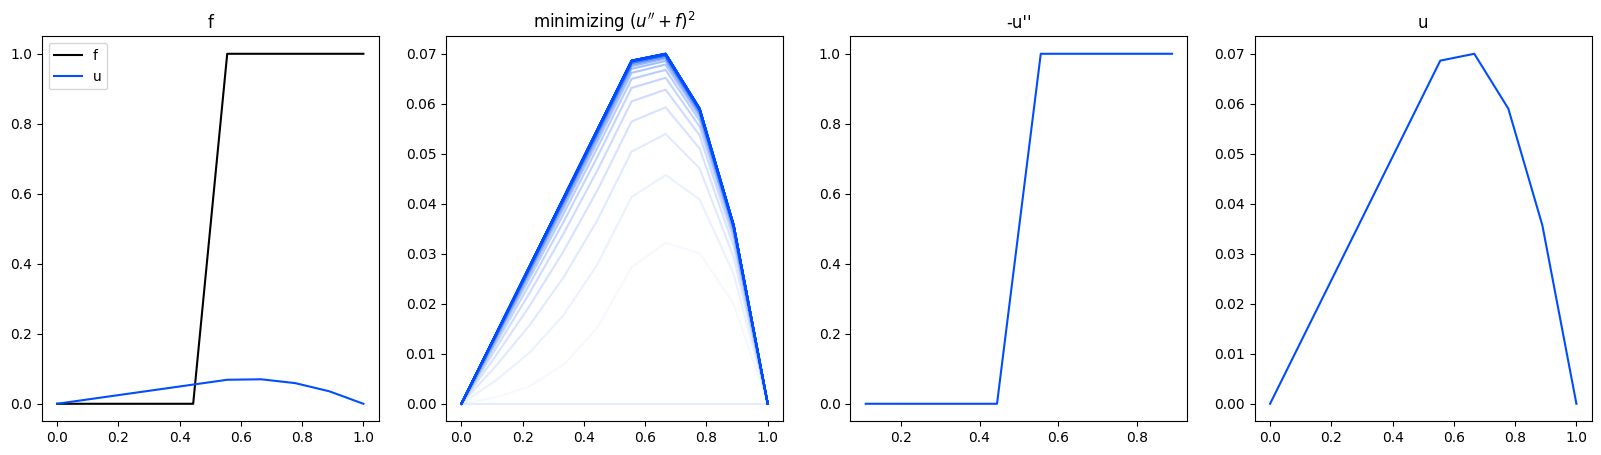

In [2]:
domain = jnp.linspace(0, 1, 10)

bdry_val = 0
bdry_laplacian = 0

# define discrete derivative of n points -> n points
# def derivative(values):
#     return jnp.concat([bdry_derivative, jnp.diff(values), bdry_derivative])


def laplacian(values):
    differences = jnp.convolve(pad(values), æ([1, -2, 1]), mode="valid")
    scaling = 1 / (domain[1] - domain[0]) ** 2
    return scaling * differences


def plot(values, title):
    plt.plot(values)
    plt.title(title)
    plt.show()


def pad(values):
    return jnp.pad(
        values, (1, 1), mode="constant", constant_values=(bdry_val, bdry_val)
    )


key = random.PRNGKey(0)
values = random.normal(key, (len(domain) - 2,)) * 0


f = jnp.sin(domain)
# f = jnp.zeros(len(domain))
f = jnp.where(domain < 0.5, 0, 1)
# f = jnp.ones(len(domain)) * 1
# f = f.at[len(domain) // 2].set(1)


fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].set_title("f")
axs[0].plot(domain, f, label="f", c="black")

import pylab

colormap = pylab.cm.jet

n = 200
axs[1].plot(domain, pad(values), c=colormap(0.2), alpha=0.1)
for i in range(n):
    values = values - (0.005 * (-laplacian(values) - f[1:-1]))
    # values = values.at[æ([0, -1])].set([bdry_val, bdry_val])
    if i % 8 == 0:
        axs[1].plot(domain, pad(values), c=colormap(0.2), alpha=1 * (i / n))
axs[1].set_title("minimizing $(u'' + f)^2$")


axs[0].plot(domain, pad(values), c=colormap(0.2), alpha=1 * (i / n), label="u")
axs[0].legend()


axs[2].set_title("-u''")
axs[2].plot(domain[1:-1], -laplacian(values), c=colormap(0.2), alpha=1)


axs[3].set_title("u")
axs[3].plot(domain, pad(values), c=colormap(0.2), alpha=1)


print(values)

In [21]:
state = 100
space = jnp.linspace(0, 1, state)

all = [[0] * (state)]
for i in range(state - 2):
    all.append([0] * i + [-1, 2, -1] + [0] * (state - i - 3))
all.append([0] * (state))
print(all)
L = jnp.array(all)
L

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-1, 2, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, -1, 2, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, -1, 2, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Array([[ 0,  0,  0, ...,  0,  0,  0],
       [-1,  2, -1, ...,  0,  0,  0],
       [ 0, -1,  2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2, -1,  0],
       [ 0,  0,  0, ..., -1,  2, -1],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)

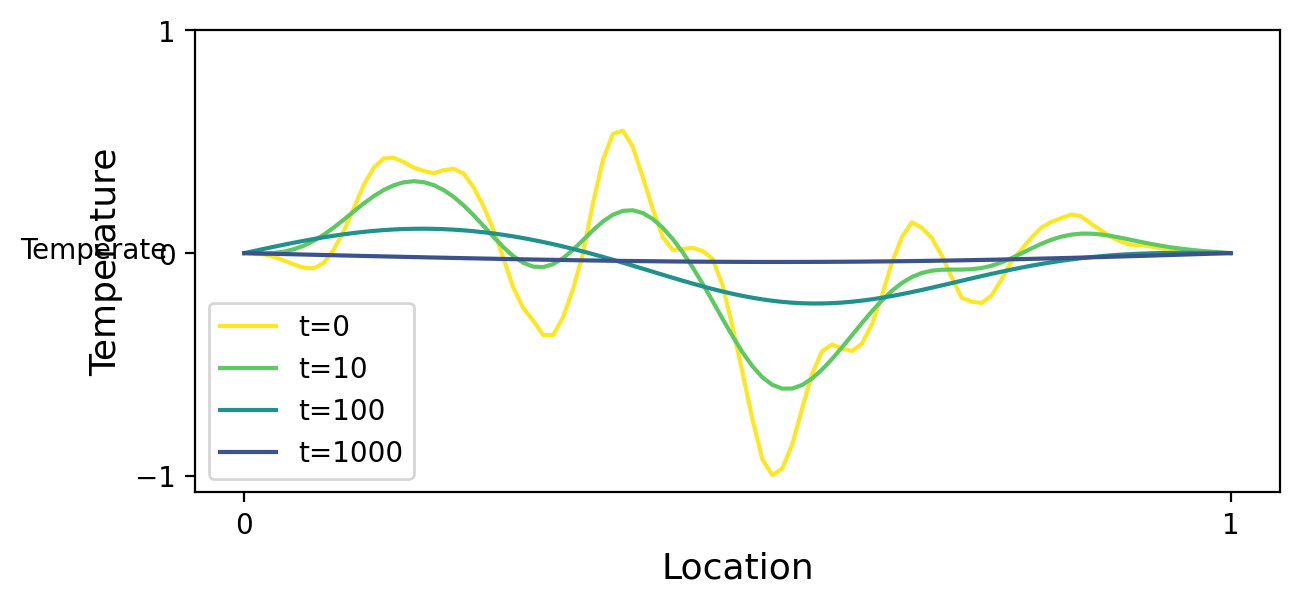

In [115]:
from diffrax import diffeqsolve, ODETerm, SaveAt, PIDController, Kvaerno5


import numpy as np


def vector_field(t, y, args):
    return -L @ y


np.random.seed(9)

start = np.random.normal(0, 1, state)
n = 5
for k in range(3):
    start = np.convolve(start, [1 / n] * n, mode="same")
# space = jnp.linspace(0, 1, state)
# start = jnp.sin(4 * jnp.pi * space)
start *= 1 - np.exp(-40 * (np.abs(1 - space) ** 2)) - np.exp(-40 * (np.abs(space) ** 2))


end = 1000
# Solve the system
sol = diffeqsolve(
    ODETerm(vector_field),
    Kvaerno5(),
    t0=0,
    t1=end,
    dt0=0.01,
    y0=start,
    saveat=SaveAt(ts=jnp.linspace(0, end, end)),
    stepsize_controller=PIDController(rtol=1e-4, atol=1e-4),
    max_steps=50000,
).ys
fig, ax = plt.subplots(1, 1, dpi=200, figsize=(7, 3))


cmap = plt.get_cmap("viridis")
for i, time in enumerate([0, 10, 100, 1000]):
    time = int(time)
    ax.plot(space, sol[time, :], label=f"t={time}", c=cmap((4 - i) / 4))
ax.legend()
ax.set_ylabel("Temperature", fontsize=13)
ax.set_yticks([-1, 0, 1])
fig.text(0, 0.5, "Temperate")
ax.set_xlabel("Location", fontsize=13)
ax.set_xticks([0, 1])
fig.savefig(
    "../../markdown/latex/images/1D_heat.png",
    dpi=100,
    transparent=True,
    bbox_inches="tight",
    pad_inches=0.1,
)
# ax.set_axis_off()

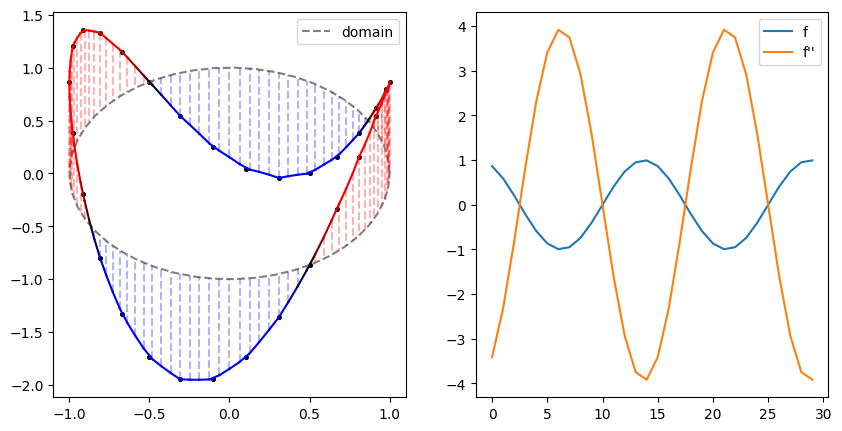

In [3]:
def plot_circle_values(ax, values, shaded=False, alpha=1.0):
    data = jnp.interp(
        jnp.linspace(0, 2 * jnp.pi, 100, endpoint=False),
        jnp.linspace(0, 2 * jnp.pi, len(values), endpoint=False),
        values,
        period=2 * jnp.pi,
    )

    means = jnp.convolve(æ(data.tolist() + [data[0]]), æ([0.5, 0.5]), mode="valid") / 3

    # go through the values and plot them
    xs = []
    ys = []

    for angle, value in zip(
        jnp.linspace(0, 2 * jnp.pi, len(data), endpoint=False).tolist() + [0],
        data.tolist() + [data[0]],
    ):
        xs.append(jnp.cos(angle))
        ys.append(jnp.sin(angle) + value)

    def sigmoid(x):
        return 1 / (1 + jnp.exp(-x))

    positive_shaded = (1, 0, 0, 0.3)
    negative_shaded = (0, 0, 1, 0.3)

    colors = [
        (s, 0, 0, 1) if s > 0 else (0, 0, -s, 1)
        for s in (sigmoid(means * 20) * 2 - 1).tolist()
    ]

    for i in range(len(xs) - 1):
        ax.plot([xs[i], xs[i + 1]], [ys[i], ys[i + 1]], c=colors[i], alpha=alpha)
        if shaded:
            ax.plot(
                [xs[i], xs[i]],
                [ys[i], ys[i] - data[i]],
                c=(positive_shaded if data[i] > 0 else negative_shaded),
                linestyle="--",
            )
    ax.plot([xs[-1], xs[0]], [ys[-1], ys[0]], c=colors[-1], alpha=alpha)

    # small dots at the actual values to indicate where interpolation happens
    for angle, value in zip(
        jnp.linspace(0, 2 * jnp.pi, len(values), endpoint=False), values
    ):
        ax.scatter(jnp.cos(angle), jnp.sin(angle) + value, c="black", s=7, alpha=alpha)

    ax.legend()


def plot_circle_domain(ax):
    tau_range = jnp.linspace(0, 2 * jnp.pi, 50)
    ax.plot(
        jnp.cos(tau_range), jnp.sin(tau_range), label="domain", c="gray", linestyle="--"
    )
    ax.legend()


# circle_function_plot(ax, f, shaded=True)
def before_after(before, values, after):
    return jnp.concatenate([before, values, after])


def laplacian_circle(values):
    differences = jnp.convolve(
        æ([values[-1]] + values.tolist() + [values[0]]), æ([1, -2, 1]), mode="valid"
    )
    scaling = 1 / (2 * jnp.pi / len(values)) ** 2
    return scaling * differences


# f = æ([0, 0, 1, 0, 0])
# f = random.normal(key, (50,))
f = jnp.sin(jnp.linspace(0, 4 * jnp.pi, 30, endpoint=False))
f = jnp.roll(f, 10)


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_circle_domain(ax[0])
plot_circle_values(ax[0], (f), shaded=True)

ax[1].plot(f, label="f")
ax[1].plot(laplacian_circle(f), label="f''")
ax[1].legend()

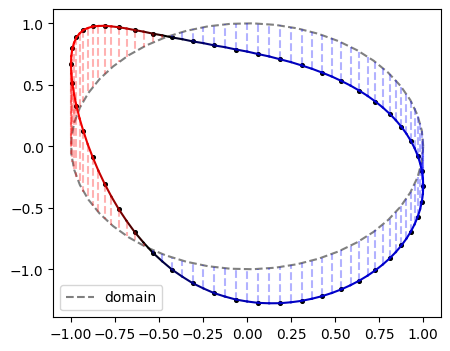

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# f = jnp.where(jnp.linspace(0, 2*jnp.pi, 10) < jnp.pi, 1, 0) - 0.5
# f = jnp.concatenate([f] * 3) * 1

# f = jnp.sin(jnp.linspace(0, 6*jnp.pi, 50, endpoint=False))
# f = jnp.roll(f, 10)

f = jnp.exp(-(jnp.linspace(-jnp.pi, jnp.pi, 50) ** 2)) - 0.325

plot_circle_domain(ax)
plot_circle_values(ax, f, shaded=True)

0.00038119926


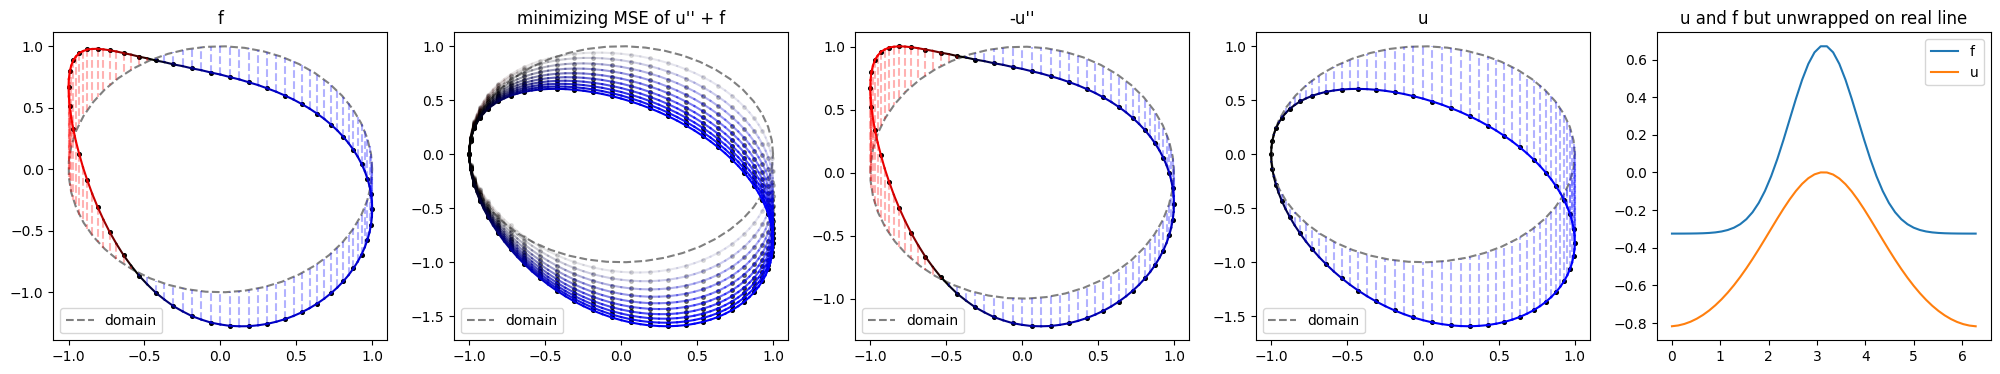

In [5]:
fig, axs = plt.subplots(1, 5, figsize=(25, 4))
axs[0].set_title("f")
plot_circle_domain(axs[0])
plot_circle_values(axs[0], f, shaded=True)

axs[1].set_title("minimizing MSE of u'' + f")
values = jnp.zeros_like(f)
plot_circle_domain(axs[1])

n = 1000
for i in range(n):
    values = values - (-laplacian_circle(values) - f) * 0.005
    values = values.at[25].set(0)
    if i % 100 == 0:
        plot_circle_values(axs[1], values, alpha=((1.0 * i) / n))

plot_circle_values(axs[1], values, alpha=((1.0 * i) / n) ** 2)

print(jnp.max(values))

axs[2].set_title("-u''")
plot_circle_domain(axs[2])
plot_circle_values(axs[2], -laplacian_circle(values), shaded=True)

axs[3].set_title("u")
plot_circle_domain(axs[3])
plot_circle_values(axs[3], values, shaded=True)

x = jnp.linspace(0, 2 * jnp.pi, 50)
axs[4].set_title("u and f but unwrapped on real line")
axs[4].plot(x, f, label="f")
axs[4].plot(x, values, label="u")
axs[4].legend()

## Exact solutions

In [6]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax.random as random
from jax.numpy import array as æ

# now, import linear algebra functions
from jax.numpy import linalg as la

### (0, 1) Poisson Equation

[[-162.   81.    0.    0.    0.    0.    0.    0.]
 [  81. -162.   81.    0.    0.    0.    0.    0.]
 [   0.   81. -162.   81.    0.    0.    0.    0.]
 [   0.    0.   81. -162.   81.    0.    0.    0.]
 [   0.    0.    0.   81. -162.   81.    0.    0.]
 [   0.    0.    0.    0.   81. -162.   81.    0.]
 [   0.    0.    0.    0.    0.   81. -162.   81.]
 [   0.    0.    0.    0.    0.    0.   81. -162.]]


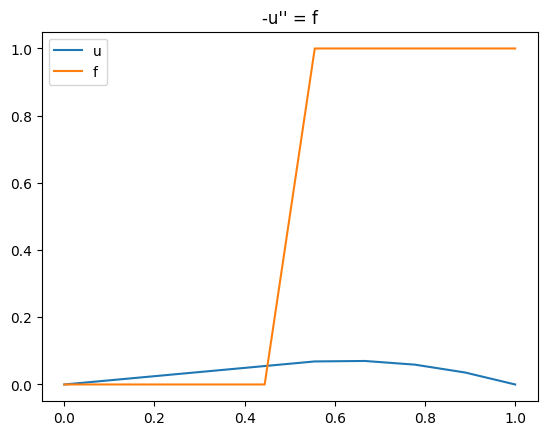

In [7]:
n = 10

domain = jnp.linspace(0, 1, n, endpoint=True)


def pad(values):
    return jnp.pad(values, (1, 1), mode="constant", constant_values=(0, 0))


def laplacian(values):
    differences = jnp.convolve(pad(values), æ([1, -2, 1]), mode="valid")
    scaling = 1 / (domain[1] - domain[0]) ** 2
    return scaling * differences


# we want the laplacian matrix:
def discrete_euclidean_laplace_matrix(domain):
    n = len(domain)
    lapl = (
        -jnp.eye(n) * 2
        + jnp.roll(jnp.eye(n), 1, axis=0)
        + jnp.roll(jnp.eye(n), -1, axis=0)
    )
    lapl = lapl[1:-1, 1:-1]
    lengths = domain[1:] - domain[:-1]
    inv_weights = lengths[:-1] * lengths[1:]
    return lapl / inv_weights


D = discrete_euclidean_laplace_matrix(domain)

print(D.round(2))

f = jnp.where(domain < 0.5, 0, 1)

solution = la.solve(D, -f[1:-1])

plt.title("-u'' = f")
plt.plot(domain, pad(solution), label="u")
plt.plot(domain, f, label="f")
plt.legend()

### $S^1$ Poisson Equation

Text(0.5, 1.0, "-u''")

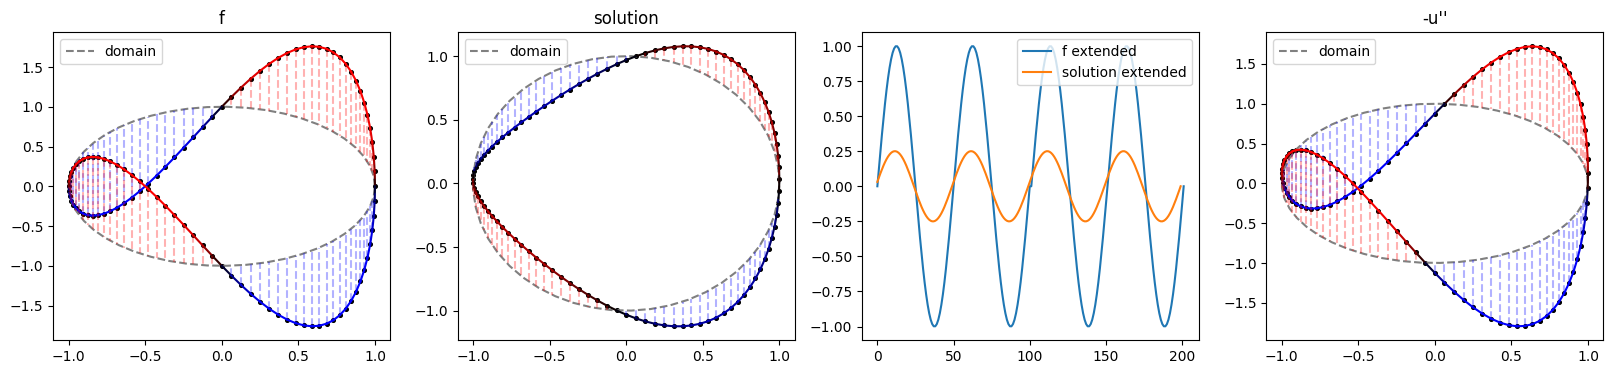

In [ ]:
n = 100

domain = jnp.linspace(0, 2 * jnp.pi, n + 1, endpoint=True)


def discrete_circle_laplace_matrix(domain):
    n = len(domain) - 1
    lapl = (
        -jnp.eye(n) * 2
        + jnp.roll(jnp.eye(n), 1, axis=0)
        + jnp.roll(jnp.eye(n), -1, axis=0)
    )

    lengths = jnp.diff(domain)
    inv_weights = jnp.roll(lengths, -1) * lengths
    return lapl / inv_weights


D = discrete_circle_laplace_matrix(domain)

f = jnp.where(domain < jnp.pi, -1, 1)
f = jnp.roll(f, +25)
f = jnp.sin(domain * 2)

solution = la.solve(D[1:, 1:], -f[1:-1])
solution = jnp.append(solution, 0)

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

plot_circle_domain(axs[0])
plot_circle_values(axs[0], f[:-1], shaded=True)
axs[0].set_title("f")

plot_circle_domain(axs[1])
plot_circle_values(axs[1], solution, shaded=True)
axs[1].set_title("solution")

axs[2].plot(f.tolist() * 2, label="f extended")
axs[2].plot(solution.tolist() * 2, label="solution extended")
axs[2].legend()

plot_circle_domain(axs[3])
plot_circle_values(
    axs[3], -discrete_circle_laplace_matrix(domain) @ solution, shaded=True
)

axs[3].set_title("-u''")

## Stochastic forcing term

In [ ]:
n = 100

domain = jnp.linspace(0, 1, n, endpoint=True)


def pad(values):
    return jnp.pad(values, (1, 1), mode="constant", constant_values=(0, 0))


def laplacian(values):
    differences = jnp.convolve(pad(values), æ([1, -2, 1]), mode="valid")
    scaling = 1 / (domain[1] - domain[0]) ** 2
    return scaling * differences


# we want the laplacian matrix:
def discrete_euclidean_laplace_matrix(domain):
    n = len(domain)
    lapl = (
        -jnp.eye(n) * 2
        + jnp.roll(jnp.eye(n), 1, axis=0)
        + jnp.roll(jnp.eye(n), -1, axis=0)
    )
    lapl = lapl[1:-1, 1:-1]
    lengths = domain[1:] - domain[:-1]
    inv_weights = lengths[:-1] * lengths[1:]
    return lapl / inv_weights


D = discrete_euclidean_laplace_matrix(domain)

# print(D.round(2))

import numpy as np

funcs = []

for i in range(100):
    f = np.cumsum(np.random.randn(len(domain)) * 0.3 + 0.01)
    solution = la.solve(D, -f[1:-1])
    funcs.append(pad(solution))

funcs = np.array(funcs)

plt.title("-u'' = f")
m = funcs.mean(axis=0)
s = funcs.std(axis=0)
plt.plot(domain, m)
plt.fill_between(domain, m - s, m + s, alpha=0.1)
plt.fill_between(domain, m - 2 * s, m + 2 * s, alpha=0.1)
plt.legend()